In [82]:
# Instructions

# Here is the list of steps to be followed (building a simple model without balancing the data):

# 1. Import the required libraries and modules that you would need.

# 2. Read that data into Python and call the dataframe donors.

# 3. Check the datatypes of all the columns in the data.

# 4. Check for null values in the dataframe. Replace the null values using the methods learned in class.

# 5. Split the data into numerical and catagorical. Decide if any columns need their dtype changed.

# 6. Concatenate numerical and categorical back together again for your X dataframe. Designate the Target as y.

# 7. Split the data into a training set and a test set.
# 8. Split further into train_num and train_cat. Also test_num and test_cat.
# 9. Scale the features either by using normalizer or a standard scaler. (train_num, test_num)


In [177]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt

In [84]:
# 5. Split the data into numerical and catagorical.
numerical = pd.read_csv('numerical.csv')
numerical = numerical.drop(['Unnamed: 0'], axis=1)
categorical = pd.read_csv('categorical.csv')
categorical = categorical.drop(['Unnamed: 0'], axis=1)
print(numerical.shape)
print(categorical.shape)

(95412, 321)
(95412, 10)


In [85]:
numerical.head()

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,...,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.000000,0.0,9.0,0,0,39,34,...,9402,10.0,9512,8911,4.0,7.741935,95515,0,4,39.0
1,9401,1,5202,46.000000,6.0,9.0,16,0,15,55,...,9512,25.0,9512,9310,18.0,15.666667,148535,0,2,1.0
2,9001,1,0,61.611649,3.0,1.0,2,0,20,29,...,9207,5.0,9512,9001,12.0,7.481481,15078,1,4,60.0
3,8701,0,2801,70.000000,1.0,4.0,2,0,23,14,...,9411,10.0,9512,8702,9.0,6.812500,172556,1,4,41.0
4,8601,0,2001,78.000000,3.0,2.0,60,1,28,9,...,9601,15.0,9601,7903,14.0,6.864865,7112,1,2,26.0


In [86]:
categorical.head()

,STATE,ZIP,CLUSTER,HOMEOWNR,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B
0,IL,61081,36,40,3,L,E,C,T,2
1,CA,91326,14,H,3,L,G,A,S,1
2,NC,27017,43,U,3,L,E,C,R,2
3,CA,95953,44,U,3,L,E,C,R,2
4,FL,33176,16,H,3,L,F,A,S,2


In [87]:
categorical = categorical.drop(['ZIP', 'CLUSTER', 'DOMAIN_B'], axis=1)

In [88]:
categorical['STATE'].value_counts()

OTHER    30457
CA       17343
FL        8376
TX        7535
IL        6420
MI        5654
NC        4160
WA        3577
GA        3403
IN        2980
WI        2795
MO        2712
Name: STATE, dtype: int64

In [89]:
categorical['DATASRCE'].value_counts()

3    64829
2    23455
1     7128
Name: DATASRCE, dtype: int64

In [90]:
#  Decide if any columns need their dtype changed.

In [91]:
numerical.dtypes

ODATEDW       int64
TCODE         int64
DOB           int64
AGE         float64
INCOME      float64
             ...   
AVGGIFT     float64
CONTROLN      int64
HPHONE_D      int64
RFA_2F        int64
CLUSTER2    float64
Length: 321, dtype: object

In [92]:
categorical.dtypes

STATE       object
HOMEOWNR    object
DATASRCE     int64
RFA_2R      object
RFA_2A      object
GEOCODE2    object
DOMAIN_A    object
dtype: object

In [93]:
categorical['DATASRCE'] = categorical['DATASRCE'].astype(object)

In [94]:
categorical.dtypes

STATE       object
HOMEOWNR    object
DATASRCE    object
RFA_2R      object
RFA_2A      object
GEOCODE2    object
DOMAIN_A    object
dtype: object

In [95]:
# 6. Concatenate numerical and categorical back together again for your X dataframe. Designate the Target as y.

In [96]:
X = pd.concat([numerical, categorical], axis=1)
y = pd.read_csv('target.csv')
y = y.drop(['Unnamed: 0', 'TARGET_D'], axis=1)

In [97]:
y.shape

(95412, 1)

In [98]:
X.head()

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,...,HPHONE_D,RFA_2F,CLUSTER2,STATE,HOMEOWNR,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A
0,8901,0,3712,60.000000,0.0,9.0,0,0,39,34,...,0,4,39.0,IL,40,3,L,E,C,T
1,9401,1,5202,46.000000,6.0,9.0,16,0,15,55,...,0,2,1.0,CA,H,3,L,G,A,S
2,9001,1,0,61.611649,3.0,1.0,2,0,20,29,...,1,4,60.0,NC,U,3,L,E,C,R
3,8701,0,2801,70.000000,1.0,4.0,2,0,23,14,...,1,4,41.0,CA,U,3,L,E,C,R
4,8601,0,2001,78.000000,3.0,2.0,60,1,28,9,...,1,2,26.0,FL,H,3,L,F,A,S


In [100]:
# 7. Split the data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=100)

In [148]:
X_test

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,...,RFA_2A_G,GEOCODE2_A,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_C,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.759183,-0.054241,0.222969,0.305936,0.423662,0.721028,0.069008,-0.206197,0.311395,-0.646038,...,0,1,0,0,0,0,0,1,0,0
1,1.342272,-0.055266,-1.278316,0.001757,0.857416,0.721028,-0.350685,-0.206197,-0.471354,-0.514092,...,0,1,0,0,0,0,0,0,0,1
2,-0.406995,-0.055266,-1.278316,0.001757,-0.877601,-0.753857,0.173931,-0.206197,0.137451,-0.250201,...,0,1,0,0,0,0,0,0,1,0
3,-1.573173,-0.055266,-0.246036,0.999086,-0.010092,0.721028,-0.350685,-0.206197,0.659284,-0.909930,...,0,1,0,0,0,1,0,0,0,0
4,1.050727,-0.053217,1.817587,-2.050775,-0.443847,-0.385136,-0.350685,-0.206197,-0.123466,-0.580065,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38160,-0.406995,-0.053217,-0.147076,0.791141,0.857416,-0.385136,-0.245762,-0.006408,0.572311,0.211609,...,0,0,1,0,0,0,0,1,0,0
38161,-0.406995,-0.055266,-1.278316,0.001757,1.291170,0.721028,-0.350685,-0.206197,0.398367,0.079664,...,1,0,1,0,0,0,0,1,0,0
38162,1.050727,-0.054241,-0.480538,1.345661,-0.877601,-2.228741,-0.245762,-0.206197,1.355061,-0.448120,...,0,1,0,0,0,1,0,0,0,0
38163,0.759183,-0.054241,0.364140,0.097991,0.423662,-0.753857,-0.140839,-0.206197,0.920200,-1.437713,...,0,1,0,0,0,1,0,0,0,0


In [102]:
# 8. Split further into train_num and train_cat. Also test_num and test_cat.

train_num = X_train.select_dtypes(exclude='object')
train_cat = X_train.select_dtypes(include='object')
test_num = X_test.select_dtypes(exclude='object')
test_cat = X_test.select_dtypes(include='object')

In [103]:
test_num.dtypes

ODATEDW       int64
TCODE         int64
DOB           int64
AGE         float64
INCOME      float64
             ...   
AVGGIFT     float64
CONTROLN      int64
HPHONE_D      int64
RFA_2F        int64
CLUSTER2    float64
Length: 321, dtype: object

In [104]:
# 9. Scale the features either by using normalizer or a standard scaler. (train_num, test_num)
def standard_scaler(df):
    columns = df.columns
    df_copy = pd.DataFrame(StandardScaler().fit(df).transform(df))
    df_copy.columns = columns
    return df_copy

train_num_scaled = standard_scaler(train_num)
test_num_scaled = standard_scaler(test_num)

In [105]:
train_num

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,...,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
57139,9501,1,4701,51.000000,5.0,8.0,10,0,27,17,...,9512,3.0,9603,9412,12.0,5.750000,60484,1,3,22.0
28478,8601,2,2203,76.000000,5.0,2.0,11,3,52,31,...,9504,14.0,9504,8703,8.0,7.428571,119470,0,1,49.0
40113,8601,0,0,61.611649,0.0,9.0,0,2,33,15,...,8803,10.0,9601,8611,4.0,5.696970,184129,1,2,48.0
94625,9601,1,4801,50.000000,4.0,9.0,0,0,53,11,...,9601,20.0,9601,9601,8.0,20.000000,117231,0,1,13.0
38201,9501,0,6101,37.000000,6.0,8.0,4,4,32,39,...,9506,15.0,9506,9506,8.0,15.000000,133225,1,1,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65615,9101,0,1601,82.000000,1.0,1.0,4,0,19,29,...,9603,24.0,9603,9110,16.0,17.750000,144532,1,2,29.0
77655,9201,1,1,98.000000,5.0,7.0,4,0,38,27,...,9511,21.0,9511,9201,8.0,13.000000,162006,1,1,3.0
79683,8801,0,0,61.611649,1.0,3.0,0,0,46,18,...,9112,10.0,9512,8801,8.0,11.923077,43442,1,2,13.0
56088,9401,2,4601,52.000000,3.0,9.0,0,0,34,24,...,9506,25.0,9506,9401,8.0,15.000000,125047,0,2,57.0


In [106]:
train_num_scaled

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,...,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,1.044726,-0.056896,0.927990,-0.734719,0.863613,0.344811,0.731059,-0.207504,-0.302344,-0.839612,...,0.403486,-1.000829,1.104828,0.861860,0.526223,-0.716728,-0.634026,0.997331,1.015937,-0.507422
1,-1.573433,-0.055831,-0.243533,0.993455,0.863613,-1.876344,0.840295,0.380129,1.880656,0.090176,...,0.357219,-0.232763,-0.898233,-1.352704,-0.010876,-0.558820,0.433446,-1.002676,-0.848802,0.931931
2,-1.573433,-0.057962,-1.276706,-0.001168,-1.313445,0.715004,-0.361301,0.184251,0.221576,-0.972439,...,-3.696941,-0.512060,1.064362,-1.640066,-0.547976,-0.721716,1.603583,0.997331,0.083568,0.878622
3,1.335632,-0.056896,0.974888,-0.803846,0.428201,0.715004,-0.361301,-0.207504,1.967976,-1.238093,...,0.918208,0.186182,1.064362,1.452203,-0.010876,0.623807,0.392927,-1.002676,-0.848802,-0.987206
4,1.044726,-0.057962,1.584568,-1.702497,1.299024,0.344811,0.075643,0.576007,0.134256,0.621484,...,0.368785,-0.162939,-0.857767,1.155470,-0.010876,0.153444,0.682371,0.997331,-0.848802,-0.827278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57242,-0.118900,-0.057962,-0.525862,1.408217,-0.878034,-2.246536,0.075643,-0.207504,-1.000904,-0.042651,...,0.929775,0.465479,1.104828,-0.081438,1.063323,0.412144,0.886994,0.997331,0.083568,-0.134256
57243,0.172006,-0.056896,-1.276237,2.514248,0.863613,-0.025381,0.075643,-0.207504,0.658176,-0.175478,...,0.397702,0.256006,-0.756603,0.202801,-0.010876,-0.034701,1.203222,0.997331,-0.848802,-1.520300
57244,-0.991620,-0.057962,-1.276706,-0.001168,-0.878034,-1.506151,-0.361301,-0.207504,1.356736,-0.773199,...,-1.909872,-0.512060,-0.736370,-1.046600,-0.010876,-0.136010,-0.942435,0.997331,0.083568,-0.987206
57245,0.753819,-0.055831,0.881091,-0.665592,-0.007210,0.715004,-0.361301,-0.207504,0.308896,-0.374718,...,0.368785,0.535303,-0.857767,0.827502,-0.010876,0.153444,0.534374,-1.002676,0.083568,1.358406


In [107]:
test_num

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,...,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
38593,9401,1,3201,66.000000,4.0,9.0,4,0,34,20,...,9512,10.0,9512,9402,5.0,5.500000,82634,1,3,5.0
32658,9601,0,0,61.611649,5.0,9.0,0,0,25,22,...,9512,10.0,9601,9512,1.0,15.000000,67834,0,2,47.0
3153,9001,0,0,61.611649,1.0,5.0,5,0,32,26,...,9309,10.0,9509,9010,10.0,7.619048,116533,0,1,53.0
6618,8601,0,2201,76.000000,3.0,9.0,0,0,38,16,...,9010,6.0,9512,8608,6.0,7.258065,69026,1,4,33.0
95148,9501,2,6601,32.000000,2.0,6.0,0,0,29,21,...,9409,12.0,9602,9409,2.0,11.000000,89412,0,3,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22159,9001,2,2412,73.000000,5.0,6.0,1,1,37,33,...,9512,16.0,9512,9012,6.0,10.555556,105892,1,1,25.0
53222,9001,0,0,61.611649,6.0,9.0,0,0,35,31,...,9507,40.0,9507,9011,12.0,24.166667,169305,0,1,32.0
3182,9501,1,1701,81.000000,1.0,1.0,1,0,46,23,...,9512,15.0,9512,9410,14.0,10.000000,152644,1,1,49.0
85827,9401,1,3502,63.000000,4.0,5.0,2,0,41,8,...,9310,5.0,9603,9310,1.0,13.000000,10121,1,1,27.0


In [108]:
test_num_scaled

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,...,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0.759183,-0.054241,0.222969,0.305936,0.423662,0.721028,0.069008,-0.206197,0.311395,-0.646038,...,0.409119,-0.543869,-0.728519,0.832362,-0.375014,-0.712093,-0.244628,1.000917,1.016186,-1.417106
1,1.342272,-0.055266,-1.278316,0.001757,0.857416,0.721028,-0.350685,-0.206197,-0.471354,-0.514092,...,0.409119,-0.543869,1.089763,1.175309,-0.860728,0.153408,-0.512152,-0.999083,0.084267,0.823949
2,-0.406995,-0.055266,-1.278316,0.001757,-0.877601,-0.753857,0.173931,-0.206197,0.137451,-0.250201,...,-0.765587,-0.543869,-0.789809,-0.389775,0.232128,-0.519036,0.368131,-0.999083,-0.847652,1.144100
3,-1.573173,-0.055266,-0.246036,0.999086,-0.010092,0.721028,-0.350685,-0.206197,0.659284,-0.909930,...,-2.495820,-0.842596,-0.728519,-1.643090,-0.253586,-0.551924,-0.490606,1.000917,1.948105,0.076930
4,1.050727,-0.053217,1.817587,-2.050775,-0.443847,-0.385136,-0.350685,-0.206197,-0.123466,-0.580065,...,-0.186914,-0.394505,1.110193,0.854186,-0.739300,-0.211014,-0.122108,-0.999083,1.016186,-0.510013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38160,-0.406995,-0.053217,-0.147076,0.791141,0.857416,-0.385136,-0.245762,-0.006408,0.572311,0.211609,...,0.409119,-0.095778,-0.728519,-0.383540,-0.253586,-0.251505,0.175784,1.000917,-0.847652,-0.349937
38161,-0.406995,-0.055266,-1.278316,0.001757,1.291170,0.721028,-0.350685,-0.206197,0.398367,0.079664,...,0.380186,1.696585,-0.830669,-0.386658,0.474985,0.988540,1.322037,-0.999083,-0.847652,0.023572
38162,1.050727,-0.054241,-0.480538,1.345661,-0.877601,-2.228741,-0.245762,-0.206197,1.355061,-0.448120,...,0.409119,-0.170460,-0.728519,0.857303,0.717842,-0.302119,1.020873,1.000917,-0.847652,0.930666
38163,0.759183,-0.054241,0.364140,0.097991,0.423662,-0.753857,-0.140839,-0.206197,0.920200,-1.437713,...,-0.759800,-0.917278,1.130623,0.545534,-0.860728,-0.028803,-1.555373,1.000917,-0.847652,-0.243220


In [109]:
# 10. Encode the categorical features using One-Hot Encoding or Ordinal Encoding. (train_cat, test_cat)
columns_to_encode = list(train_cat.columns)
train_cat_encoded = pd.get_dummies(train_cat[columns_to_encode])

C:\Users\garpa\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [110]:
test_cat_encoded = pd.get_dummies(test_cat[columns_to_encode])

C:\Users\garpa\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [111]:
test_cat_encoded.columns

Index(['STATE_CA', 'STATE_FL', 'STATE_GA', 'STATE_IL', 'STATE_IN', 'STATE_MI',
       'STATE_MO', 'STATE_NC', 'STATE_OTHER', 'STATE_TX', 'STATE_WA',
       'STATE_WI', 'HOMEOWNR_40', 'HOMEOWNR_H', 'HOMEOWNR_U', 'DATASRCE_1',
       'DATASRCE_2', 'DATASRCE_3', 'RFA_2R_L', 'RFA_2A_D', 'RFA_2A_E',
       'RFA_2A_F', 'RFA_2A_G', 'GEOCODE2_A', 'GEOCODE2_B', 'GEOCODE2_C',
       'GEOCODE2_D', 'DOMAIN_A_C', 'DOMAIN_A_R', 'DOMAIN_A_S', 'DOMAIN_A_T',
       'DOMAIN_A_U'],
      dtype='object')

In [114]:
test_cat_encoded.reset_index(drop=True)
test_cat_encoded

,STATE_CA,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_OTHER,STATE_TX,...,RFA_2A_G,GEOCODE2_A,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_C,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
38593,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
32658,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3153,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
6618,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
95148,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22159,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
53222,1,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
3182,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
85827,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [ ]:
# 11. Fit only on train data transform both train and test

# NOT SURE WHAT THIS IS ASKING ME TO DO.

In [76]:
train_num_scaled.shape

(57247, 321)

In [115]:
train_num_scaled

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,...,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,1.044726,-0.056896,0.927990,-0.734719,0.863613,0.344811,0.731059,-0.207504,-0.302344,-0.839612,...,0.403486,-1.000829,1.104828,0.861860,0.526223,-0.716728,-0.634026,0.997331,1.015937,-0.507422
1,-1.573433,-0.055831,-0.243533,0.993455,0.863613,-1.876344,0.840295,0.380129,1.880656,0.090176,...,0.357219,-0.232763,-0.898233,-1.352704,-0.010876,-0.558820,0.433446,-1.002676,-0.848802,0.931931
2,-1.573433,-0.057962,-1.276706,-0.001168,-1.313445,0.715004,-0.361301,0.184251,0.221576,-0.972439,...,-3.696941,-0.512060,1.064362,-1.640066,-0.547976,-0.721716,1.603583,0.997331,0.083568,0.878622
3,1.335632,-0.056896,0.974888,-0.803846,0.428201,0.715004,-0.361301,-0.207504,1.967976,-1.238093,...,0.918208,0.186182,1.064362,1.452203,-0.010876,0.623807,0.392927,-1.002676,-0.848802,-0.987206
4,1.044726,-0.057962,1.584568,-1.702497,1.299024,0.344811,0.075643,0.576007,0.134256,0.621484,...,0.368785,-0.162939,-0.857767,1.155470,-0.010876,0.153444,0.682371,0.997331,-0.848802,-0.827278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57242,-0.118900,-0.057962,-0.525862,1.408217,-0.878034,-2.246536,0.075643,-0.207504,-1.000904,-0.042651,...,0.929775,0.465479,1.104828,-0.081438,1.063323,0.412144,0.886994,0.997331,0.083568,-0.134256
57243,0.172006,-0.056896,-1.276237,2.514248,0.863613,-0.025381,0.075643,-0.207504,0.658176,-0.175478,...,0.397702,0.256006,-0.756603,0.202801,-0.010876,-0.034701,1.203222,0.997331,-0.848802,-1.520300
57244,-0.991620,-0.057962,-1.276706,-0.001168,-0.878034,-1.506151,-0.361301,-0.207504,1.356736,-0.773199,...,-1.909872,-0.512060,-0.736370,-1.046600,-0.010876,-0.136010,-0.942435,0.997331,0.083568,-0.987206
57245,0.753819,-0.055831,0.881091,-0.665592,-0.007210,0.715004,-0.361301,-0.207504,0.308896,-0.374718,...,0.368785,0.535303,-0.857767,0.827502,-0.010876,0.153444,0.534374,-1.002676,0.083568,1.358406


In [135]:
train_cat_encoded = train_cat_encoded.reset_index(drop=True)
test_cat_encoded = test_cat_encoded.reset_index(drop=True)

In [136]:
train_num_scaled

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,...,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,1.044726,-0.056896,0.927990,-0.734719,0.863613,0.344811,0.731059,-0.207504,-0.302344,-0.839612,...,0.403486,-1.000829,1.104828,0.861860,0.526223,-0.716728,-0.634026,0.997331,1.015937,-0.507422
1,-1.573433,-0.055831,-0.243533,0.993455,0.863613,-1.876344,0.840295,0.380129,1.880656,0.090176,...,0.357219,-0.232763,-0.898233,-1.352704,-0.010876,-0.558820,0.433446,-1.002676,-0.848802,0.931931
2,-1.573433,-0.057962,-1.276706,-0.001168,-1.313445,0.715004,-0.361301,0.184251,0.221576,-0.972439,...,-3.696941,-0.512060,1.064362,-1.640066,-0.547976,-0.721716,1.603583,0.997331,0.083568,0.878622
3,1.335632,-0.056896,0.974888,-0.803846,0.428201,0.715004,-0.361301,-0.207504,1.967976,-1.238093,...,0.918208,0.186182,1.064362,1.452203,-0.010876,0.623807,0.392927,-1.002676,-0.848802,-0.987206
4,1.044726,-0.057962,1.584568,-1.702497,1.299024,0.344811,0.075643,0.576007,0.134256,0.621484,...,0.368785,-0.162939,-0.857767,1.155470,-0.010876,0.153444,0.682371,0.997331,-0.848802,-0.827278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57242,-0.118900,-0.057962,-0.525862,1.408217,-0.878034,-2.246536,0.075643,-0.207504,-1.000904,-0.042651,...,0.929775,0.465479,1.104828,-0.081438,1.063323,0.412144,0.886994,0.997331,0.083568,-0.134256
57243,0.172006,-0.056896,-1.276237,2.514248,0.863613,-0.025381,0.075643,-0.207504,0.658176,-0.175478,...,0.397702,0.256006,-0.756603,0.202801,-0.010876,-0.034701,1.203222,0.997331,-0.848802,-1.520300
57244,-0.991620,-0.057962,-1.276706,-0.001168,-0.878034,-1.506151,-0.361301,-0.207504,1.356736,-0.773199,...,-1.909872,-0.512060,-0.736370,-1.046600,-0.010876,-0.136010,-0.942435,0.997331,0.083568,-0.987206
57245,0.753819,-0.055831,0.881091,-0.665592,-0.007210,0.715004,-0.361301,-0.207504,0.308896,-0.374718,...,0.368785,0.535303,-0.857767,0.827502,-0.010876,0.153444,0.534374,-1.002676,0.083568,1.358406


In [137]:
train_num_scaled

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,...,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,1.044726,-0.056896,0.927990,-0.734719,0.863613,0.344811,0.731059,-0.207504,-0.302344,-0.839612,...,0.403486,-1.000829,1.104828,0.861860,0.526223,-0.716728,-0.634026,0.997331,1.015937,-0.507422
1,-1.573433,-0.055831,-0.243533,0.993455,0.863613,-1.876344,0.840295,0.380129,1.880656,0.090176,...,0.357219,-0.232763,-0.898233,-1.352704,-0.010876,-0.558820,0.433446,-1.002676,-0.848802,0.931931
2,-1.573433,-0.057962,-1.276706,-0.001168,-1.313445,0.715004,-0.361301,0.184251,0.221576,-0.972439,...,-3.696941,-0.512060,1.064362,-1.640066,-0.547976,-0.721716,1.603583,0.997331,0.083568,0.878622
3,1.335632,-0.056896,0.974888,-0.803846,0.428201,0.715004,-0.361301,-0.207504,1.967976,-1.238093,...,0.918208,0.186182,1.064362,1.452203,-0.010876,0.623807,0.392927,-1.002676,-0.848802,-0.987206
4,1.044726,-0.057962,1.584568,-1.702497,1.299024,0.344811,0.075643,0.576007,0.134256,0.621484,...,0.368785,-0.162939,-0.857767,1.155470,-0.010876,0.153444,0.682371,0.997331,-0.848802,-0.827278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57242,-0.118900,-0.057962,-0.525862,1.408217,-0.878034,-2.246536,0.075643,-0.207504,-1.000904,-0.042651,...,0.929775,0.465479,1.104828,-0.081438,1.063323,0.412144,0.886994,0.997331,0.083568,-0.134256
57243,0.172006,-0.056896,-1.276237,2.514248,0.863613,-0.025381,0.075643,-0.207504,0.658176,-0.175478,...,0.397702,0.256006,-0.756603,0.202801,-0.010876,-0.034701,1.203222,0.997331,-0.848802,-1.520300
57244,-0.991620,-0.057962,-1.276706,-0.001168,-0.878034,-1.506151,-0.361301,-0.207504,1.356736,-0.773199,...,-1.909872,-0.512060,-0.736370,-1.046600,-0.010876,-0.136010,-0.942435,0.997331,0.083568,-0.987206
57245,0.753819,-0.055831,0.881091,-0.665592,-0.007210,0.715004,-0.361301,-0.207504,0.308896,-0.374718,...,0.368785,0.535303,-0.857767,0.827502,-0.010876,0.153444,0.534374,-1.002676,0.083568,1.358406


In [138]:
# 12. Again re-concatenate train_num and train_cat as X_train as well as test_num and test_cat as X_test

X_train = pd.concat([train_num_scaled,train_cat_encoded], axis=1) 
X_test = pd.concat([test_num_scaled,test_cat_encoded], axis=1)

In [140]:
X_train

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,...,RFA_2A_G,GEOCODE2_A,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_C,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,1.044726,-0.056896,0.927990,-0.734719,0.863613,0.344811,0.731059,-0.207504,-0.302344,-0.839612,...,0,0,1,0,0,0,0,1,0,0
1,-1.573433,-0.055831,-0.243533,0.993455,0.863613,-1.876344,0.840295,0.380129,1.880656,0.090176,...,0,1,0,0,0,1,0,0,0,0
2,-1.573433,-0.057962,-1.276706,-0.001168,-1.313445,0.715004,-0.361301,0.184251,0.221576,-0.972439,...,0,0,1,0,0,1,0,0,0,0
3,1.335632,-0.056896,0.974888,-0.803846,0.428201,0.715004,-0.361301,-0.207504,1.967976,-1.238093,...,0,1,0,0,0,0,0,1,0,0
4,1.044726,-0.057962,1.584568,-1.702497,1.299024,0.344811,0.075643,0.576007,0.134256,0.621484,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57242,-0.118900,-0.057962,-0.525862,1.408217,-0.878034,-2.246536,0.075643,-0.207504,-1.000904,-0.042651,...,0,1,0,0,0,0,0,0,0,1
57243,0.172006,-0.056896,-1.276237,2.514248,0.863613,-0.025381,0.075643,-0.207504,0.658176,-0.175478,...,0,1,0,0,0,0,0,1,0,0
57244,-0.991620,-0.057962,-1.276706,-0.001168,-0.878034,-1.506151,-0.361301,-0.207504,1.356736,-0.773199,...,0,0,0,1,0,1,0,0,0,0
57245,0.753819,-0.055831,0.881091,-0.665592,-0.007210,0.715004,-0.361301,-0.207504,0.308896,-0.374718,...,1,0,0,0,1,0,1,0,0,0


In [141]:
X_test

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,...,RFA_2A_G,GEOCODE2_A,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_C,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.759183,-0.054241,0.222969,0.305936,0.423662,0.721028,0.069008,-0.206197,0.311395,-0.646038,...,0,1,0,0,0,0,0,1,0,0
1,1.342272,-0.055266,-1.278316,0.001757,0.857416,0.721028,-0.350685,-0.206197,-0.471354,-0.514092,...,0,1,0,0,0,0,0,0,0,1
2,-0.406995,-0.055266,-1.278316,0.001757,-0.877601,-0.753857,0.173931,-0.206197,0.137451,-0.250201,...,0,1,0,0,0,0,0,0,1,0
3,-1.573173,-0.055266,-0.246036,0.999086,-0.010092,0.721028,-0.350685,-0.206197,0.659284,-0.909930,...,0,1,0,0,0,1,0,0,0,0
4,1.050727,-0.053217,1.817587,-2.050775,-0.443847,-0.385136,-0.350685,-0.206197,-0.123466,-0.580065,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38160,-0.406995,-0.053217,-0.147076,0.791141,0.857416,-0.385136,-0.245762,-0.006408,0.572311,0.211609,...,0,0,1,0,0,0,0,1,0,0
38161,-0.406995,-0.055266,-1.278316,0.001757,1.291170,0.721028,-0.350685,-0.206197,0.398367,0.079664,...,1,0,1,0,0,0,0,1,0,0
38162,1.050727,-0.054241,-0.480538,1.345661,-0.877601,-2.228741,-0.245762,-0.206197,1.355061,-0.448120,...,0,1,0,0,0,1,0,0,0,0
38163,0.759183,-0.054241,0.364140,0.097991,0.423662,-0.753857,-0.140839,-0.206197,0.920200,-1.437713,...,0,1,0,0,0,1,0,0,0,0


In [155]:
y_train = y_train.reset_index(drop=True)
y_train = y_train['TARGET_B'].values.ravel()

In [156]:
# 13. Fit a logistic regression model on the training data.
model = LogisticRegression(max_iter=1000).fit(X_train, y_train)


y_pred = model.predict(X_test)

In [157]:
# 14. Check the accuracy on the test data.
print('The test accuracy is ', model.score(X_test, y_test))
print('The train accuracy is ', model.score(X_train,y_train))

The test accuracy is  0.9491942879601729
The train accuracy is  0.9492724509581288


In [158]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     36226
           1       0.00      0.00      0.00      1939

    accuracy                           0.95     38165
   macro avg       0.47      0.50      0.49     38165
weighted avg       0.90      0.95      0.92     38165



C:\Users\garpa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\garpa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\garpa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:ylabel='count'>

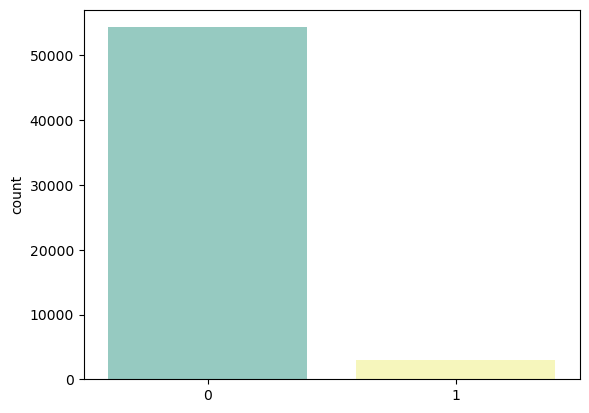

In [160]:
# Managing imbalance in the dataset

# 15. Check for the imbalance.

sns.countplot(x = y_train, data = X_train, palette = 'Set3')


The test accuracy is  0.9637967205874234
The train accuracy is  0.9629023057247483


<AxesSubplot:ylabel='count'>

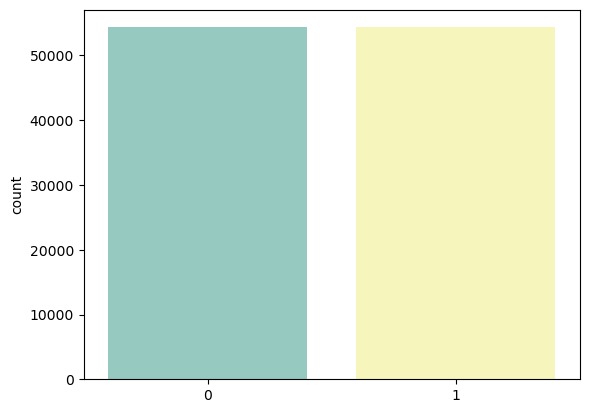

In [179]:
# 16. Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
# 17. Each time fit the model and see how the accuracy of the model has changed.

sm = SMOTE()
X_res_train, y_res_train = sm.fit_resample(X_train, y_train)
X_res_test, y_res_test = sm.fit_resample(X_test, y_test)
model = LogisticRegression(max_iter=2000).fit(X_res_train, y_res_train)
y_res_pred = model.predict(X_res_test)
print('The test accuracy is ', model.score(X_res_test, y_res_test))
print('The train accuracy is ', model.score(X_res_train,y_res_train))
sns.countplot(x = y_res_train, data = X_res_train, palette = 'Set3')

The test accuracy is  0.5613718411552346
The train accuracy is  0.6318870523415978


<AxesSubplot:ylabel='count'>

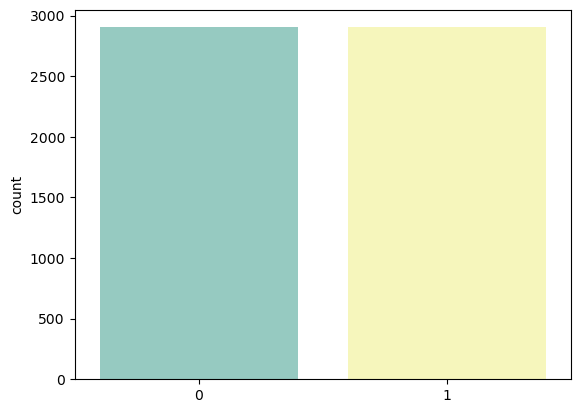

In [178]:
under_sampler = RandomUnderSampler()
X_under_train, y_under_train = under_sampler.fit_resample(X_train, y_train)
X_under_test, y_under_test = under_sampler.fit_resample(X_test, y_test)
model = LogisticRegression(max_iter=2000).fit(X_under_train, y_under_train)
y_res_pred = model.predict(X_under_test)
print('The test accuracy is ', model.score(X_under_test, y_under_test))
print('The train accuracy is ', model.score(X_under_train,y_under_train))
sns.countplot(x = y_under_train, data = X_under_train, palette = 'Set3')